# Quartile - wozu?
Angenommen, Sie sind Trainer einer Basketballmannschaft und möchten einen neuen Spieler verpflichten. Um nicht die Katze im Sack zu kaufen, macht eine Analyse deren Wurfstatistik Sinn.

In [1]:
import pandas as pd

**Anm.:** Nachfolgende Listen `p1`, `p2` und `p3` enthalten die Anzahl der geworfenen Körbe je Spiel. Spieler 1 hat bspw. in einem Spiel 7 Körbe, im nächsten 8 Körbe und dann 2x 9 Körbe usw. geworfen.

In [3]:
p1 = [7, 8 , 9, 9, 10, 10, 10, 11, 11, 12, 13]

p2 = [7, 9, 9, 10, 10, 10, 10, 10, 11, 11, 13]

p3 = [3, 3, 6, 7, 7, 10, 10, 10, 11, 13, 30]

data = {"Player 1" : p1,
        "Player 2" : p2,
        "Player 3" : p3}

# @ToDo: DF erstellen
df = pd.DataFrame(data)
df

,Player 1,Player 2,Player 3
0,7,7,3
1,8,9,3
2,9,9,6
3,9,10,7
4,10,10,7
5,10,10,10
6,10,10,10
7,11,10,10
8,11,11,11
9,12,11,13


In [4]:
# @ToDo: Arithmetischen Mittel/Spieler:
df.mean()

Player 1    10.0
Player 2    10.0
Player 3    10.0
dtype: float64

In [ ]:
# @ToDo: Median/Spieler
df.median()

Wir sehen, dass alle Spieler den gleichen arithmetischen Mittelwert als auch Median aufweisen. Blöd, denn das hilft unserem Coach definitiv nicht weiter. **Hintergrund**: Mit Mittelwerten kann man das Zentrum einer Datenreihe bestimmen, aber sie sagen uns nichts über die Variation darin. Auch wenn alle Spieler den gleichen mittlern Punktestand haben, gibt es zwischen den Datenreihen erhebliche Unterschiede. Diese gilt es herauszufinden, und zwar durch die Berechnung der Quartile (Viertel).  

## Quartil berechnen
Eine geordnete Liste (Datenreihe) hat üblicherweise **drei** Quartile, die die Liste in vier Teile unterteilt. Diese vier Teile bestehen aus (fast) gleich vielen Werten. 

Es gilt:
- Das erste Quartil **Q1** ist >= 25% aller Werte der Datenreihe und <= als 75% aller Werte.
- Das zweite Quartil **Q2** (=Median) ist >= 50% aller Werte der Datenreihe und <= als 50% aller Werte.
- Das dritte Quartil **Q3** ist >= 75% aller Werte der Datenreihe und <= 25% aller Werte.


**Darstellung am Beispiel (keine Spieler-Daten!): `1 1 1 2 2 2 2 3 3 3 3 3 4 4 4 4 5 5 5 10`**

<span style="color:blue">1 1 1 2 2 </span> Q1  <span style="color:red">2 2 3 3 3 </span> Q2 <span style="color:green"> 3 3 4 4 4</span> Q3 <span style="color:orange">4 5 5 5 10</span>

Der **Interquartilsabstand** schließt Ausreißer aus, indem er nur die mittlern 50% der Daten benutzt. Als Ausreißer werden extrem hohe oder niedrige Werte bezeichnet. Der Interquartilsabstand liegt also zwischen Q1 und Q3 - 25% der Werte liegen somit darunter bzw. darüber!

In [5]:
import matplotlib.pyplot as plt

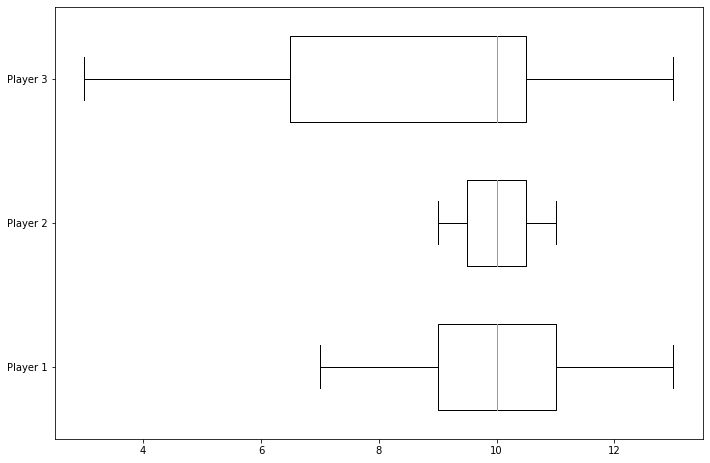

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
bp = ax.boxplot([p1, p2, p3], vert=False, showfliers=False, widths=0.6, labels=["Player 1", "Player 2", "Player 3"])
plt.show()

**Erläuterung Boxplot**: Die orange Linie markiert den Median (bei den allen Spielern 10). Das Rechteck, das die Median-Linie umfasst, begrenzt den sog. Interquartilsabstand. Die Linie mit den kopfseitigen vertikalen Abschlüssen markiert die Spannweite mit dem Maximal- als auch Minimalwert der jeweiligen Datenreihe.

Ausgabe der Quartile mittels `describe()` oder  der Methode `quantile`:

In [8]:
# @ToDo
df.describe()
df.quantile([0.25, 0.75])

,Player 1,Player 2,Player 3
0.25,9.0,9.5,6.5
0.75,11.0,10.5,10.5


Details bzgl. der Quartil-Berechnung liefer `qcut()` (Quelle: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html#pandas-qcut) 

In [9]:
# Daten des Spielers 2: 7, 9, 9, | 10, 10, 10, 10, 10, | 11, 11, 13
# @ToDo
pd.qcut(df['Player 2'], q=4, labels = False)

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     3
9     3
10    3
Name: Player 2, dtype: int64